In [5]:
!pip install chromadb langchain openai tiktoken

ERROR: Could not find a version that satisfies the requirement chromadb (from versions: none)
ERROR: No matching distribution found for chromadb


**Loading Libraries**

In [1]:
import pandas as pd
# import tiktoken
# import os
# import openai

# from openai.embeddings_utils import get_embedding

# from langchain.chains import RetrievalQA
# from langchain.document_loaders import TextLoader
# from langchain.embeddings.openai import OpenAIEmbeddings
# from langchain.llms import OpenAI
# from langchain.text_splitter import CharacterTextSplitter
# from langchain.vectorstores import Chroma
# from langchain.document_loaders.csv_loader import CSVLoader

**Data Preprocessing**

In [2]:
anime = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/anime_with_synopsis.csv')
anime.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [8]:
anime = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [7]:
anime = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/animelist.csv')
anime.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [10]:
anime = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/watching_status.csv')
anime.head()

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


In [12]:
anime = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/rating_complete.csv')
anime.head(10)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
5,0,431,8
6,0,578,10
7,0,433,6
8,0,1571,10
9,0,121,9


In [19]:
anime.shape
anime.head(50)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
5,0,431,8
6,0,578,10
7,0,433,6
8,0,1571,10
9,0,121,9


In [11]:
anime = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/watching_status.csv')
anime.head()

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


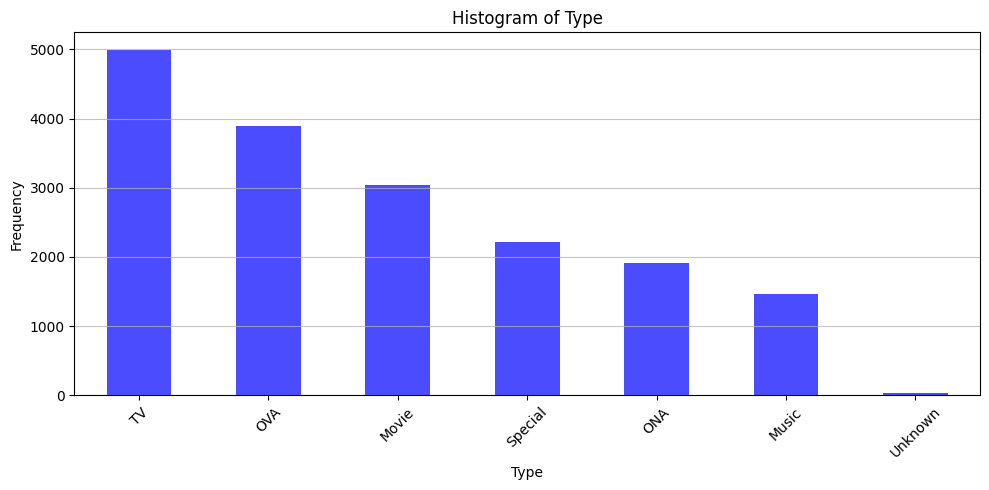

<Figure size 640x480 with 0 Axes>

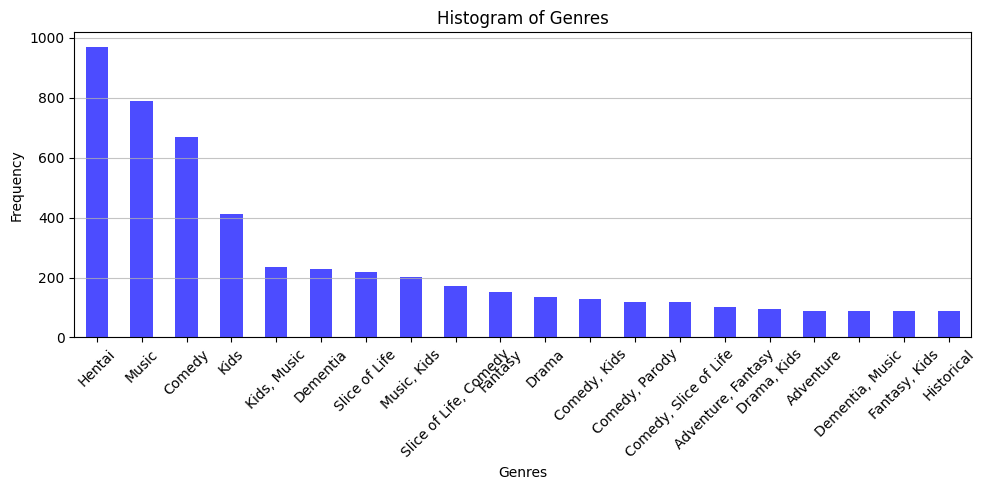

<Figure size 640x480 with 0 Axes>

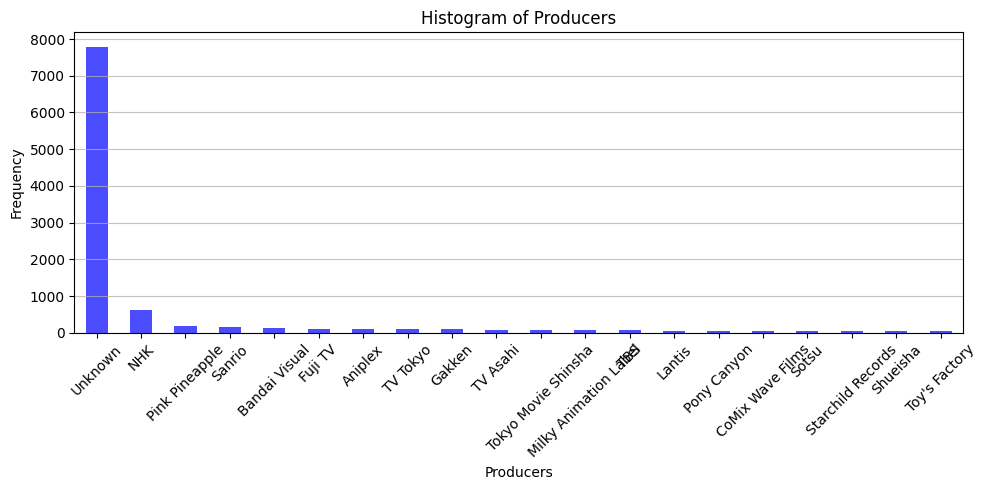

<Figure size 640x480 with 0 Axes>

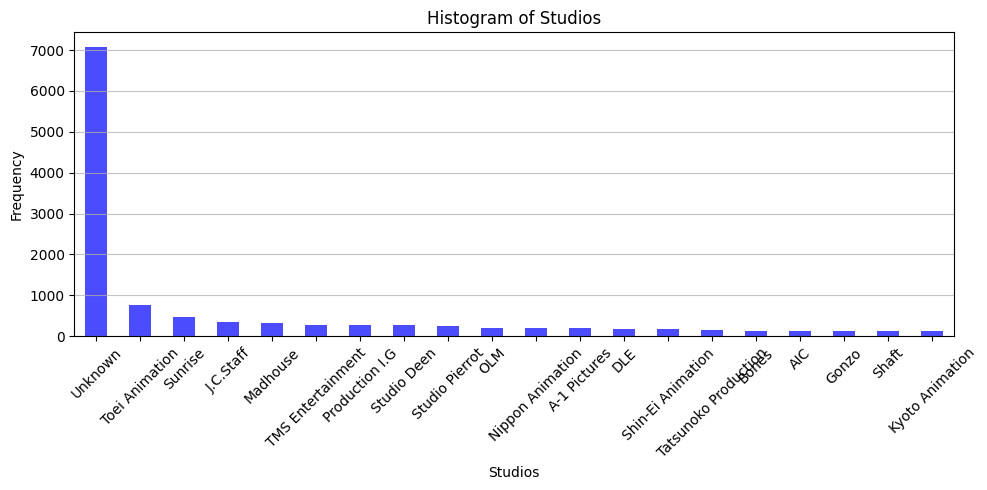

<Figure size 640x480 with 0 Axes>

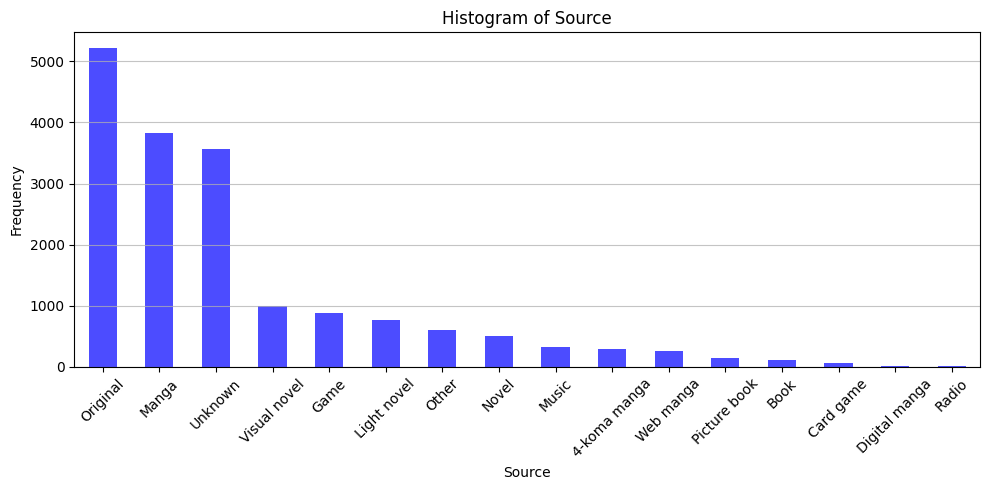

<Figure size 640x480 with 0 Axes>

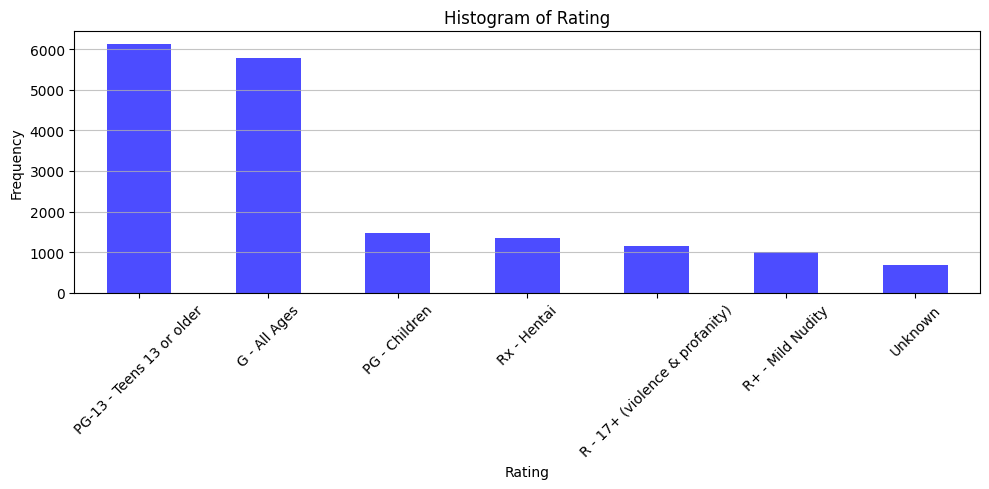

<Figure size 640x480 with 0 Axes>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
anime_data = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

# # List of numerical columns to plot
# numerical_columns = ['Members', 'Favorites', 
#                      'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']

# # Plot individual histograms for numerical columns
# for col in numerical_columns:
#     plt.figure(figsize=(10, 5))
#     plt.hist(anime_data[col].dropna(), bins=30, color='blue', alpha=0.7)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.grid(axis='y', alpha=0.75)
#     plt.show()

# List of categorical columns to plot
categorical_columns = ['Type','Genres', 'Producers', 'Studios', 'Source', 'Rating']

# Plot individual bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    anime_data[col].value_counts().head(20).plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()
    # Save the plot as a PNG file
    filename = f"{col}_histogram.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

In [4]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the CSV data
# anime_data = pd. read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

# # List of numerical columns to plot
# numerical_columns = ['Members', 'Favorites', 
#                      'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']

# # Plot individual histograms for numerical columns with label adjustments
# for col in numerical_columns:
#     plt.figure(figsize=(12, 6))  # Increase figure size for better readability
#     plt.hist(anime_data[col].dropna(), bins=30, color='blue', alpha=0.7)
#     plt.title(f'Distribution of {col}', fontsize=14)
#     plt.xlabel(col, fontsize=12)
#     plt.ylabel('Frequency', fontsize=12)
#     plt.xticks(rotation=90, fontsize=5)  # Rotate x-axis labels and adjust font size
#     plt.yticks(fontsize=10)  # Adjust y-axis label font size
#     plt.grid(axis='y', alpha=0.75)
#     plt.tight_layout(pad=2)  # Add padding to prevent label overlap
#     plt.show()
#     # Save the plot as a PNG file
#     filename = f"{col}_histogram.png"
#     plt.savefig(filename, dpi=300, bbox_inches='tight')


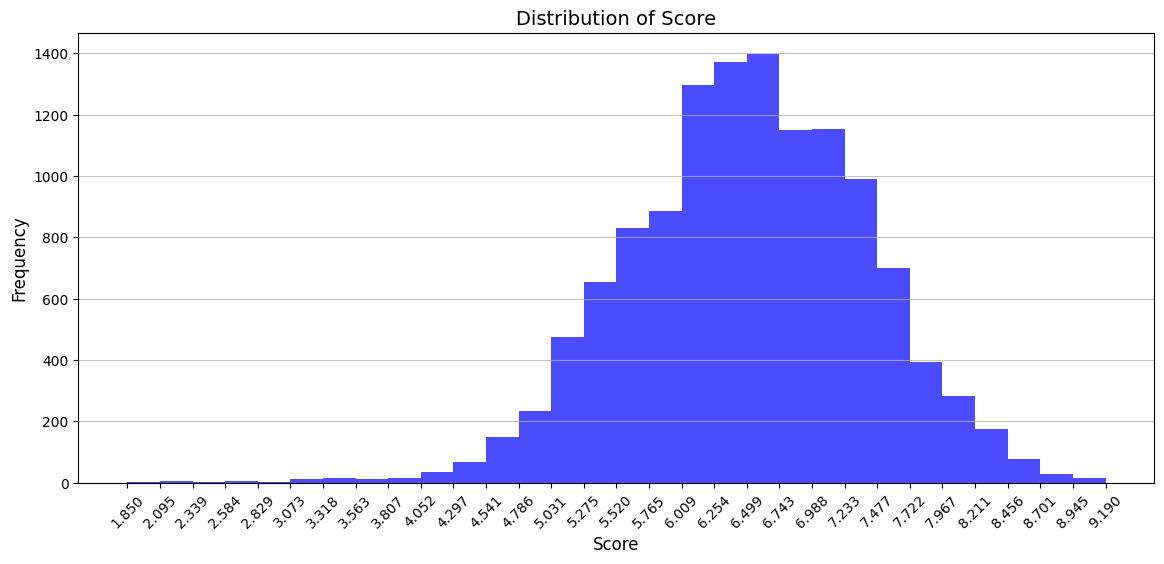

<Figure size 640x480 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data
anime_data = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

# Function to convert duration to minutes
def convert_duration(duration):
    try:
        if isinstance(duration, str):
            if 'hr' in duration and 'min' in duration:
                # Parse hours and minutes
                parts = duration.split()
                hours = float(parts[0])  # First part is hours
                minutes = float(parts[2]) if len(parts) > 2 else 0  # Third part is minutes
                return hours * 60 + minutes
            elif 'hr' in duration:
                # Only hours are present
                hours = float(duration.split()[0])
                return hours * 60
            elif 'min' in duration:
                # Only minutes are present
                return float(duration.split()[0])
    except ValueError:
        pass  # Handle cases where conversion fails
    return np.nan  # Return NaN for unrecognized formats

# Convert Duration to numeric
anime_data['Duration'] = anime_data['Duration'].apply(convert_duration)

# List of numerical columns to plot
# numerical_columns = ['Score', 'Duration', 'Members', 'Favorites', 
#                      'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']
numerical_columns = ['Score']

# Plot individual histograms for numerical columns with label adjustments
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # Remove non-numeric values and convert to float
    data = pd.to_numeric(anime_data[col], errors='coerce').dropna()
    
    # Calculate histogram bins and plot the histogram
    bins = 30  # Number of bins
    counts, bin_edges = np.histogram(data, bins=bins)
    plt.hist(data, bins=bin_edges, color='blue', alpha=0.7)
    
    # Set title and labels
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Use only bin edges as x-axis ticks
    plt.xticks(bin_edges, rotation=45, fontsize=10)
    
    # Adjust y-axis tick font size
    plt.yticks(fontsize=10)
    
    # Add gridlines for better readability
    plt.grid(axis='y', alpha=0.75)
    
    # Optimize layout to prevent overlap
    plt.tight_layout(pad=2)
    
    # Show the plot
    plt.show()
    # Save the plot as a PNG file
    filename = f"{col}_histogram.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')


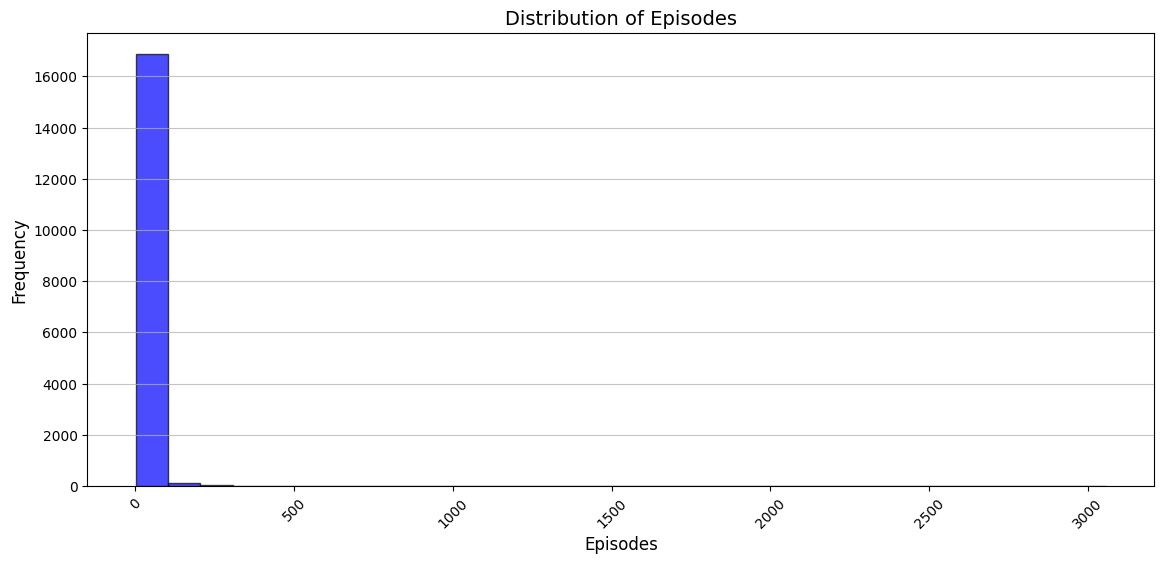

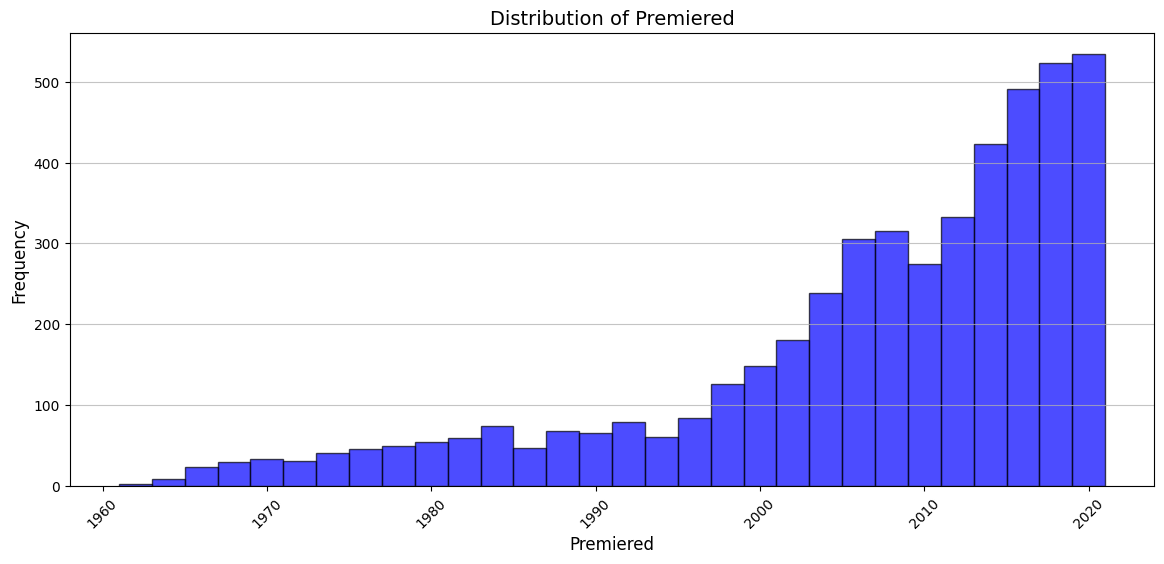

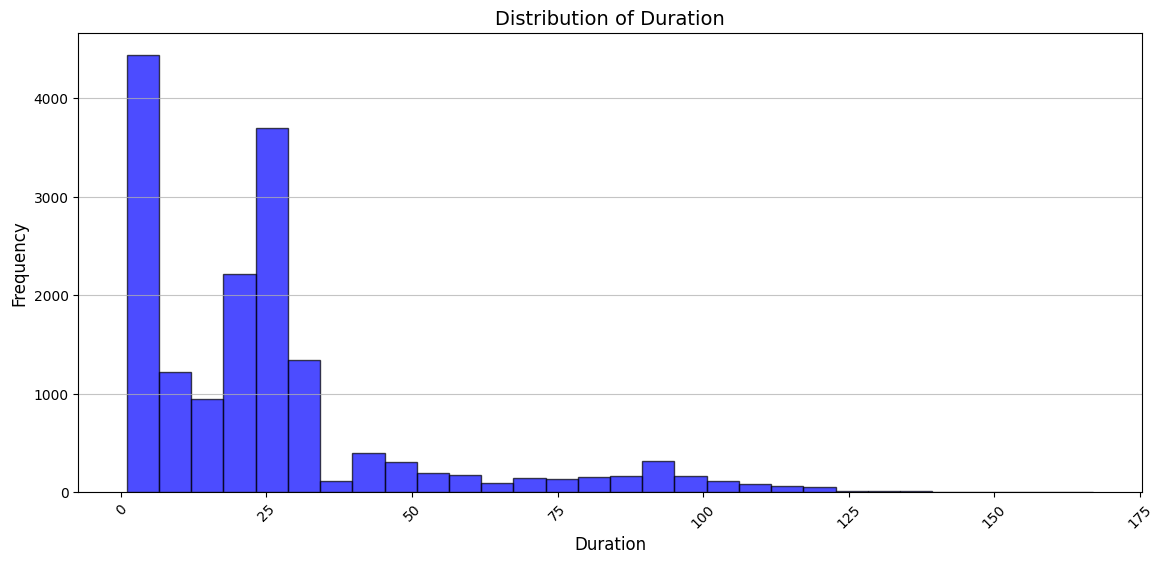

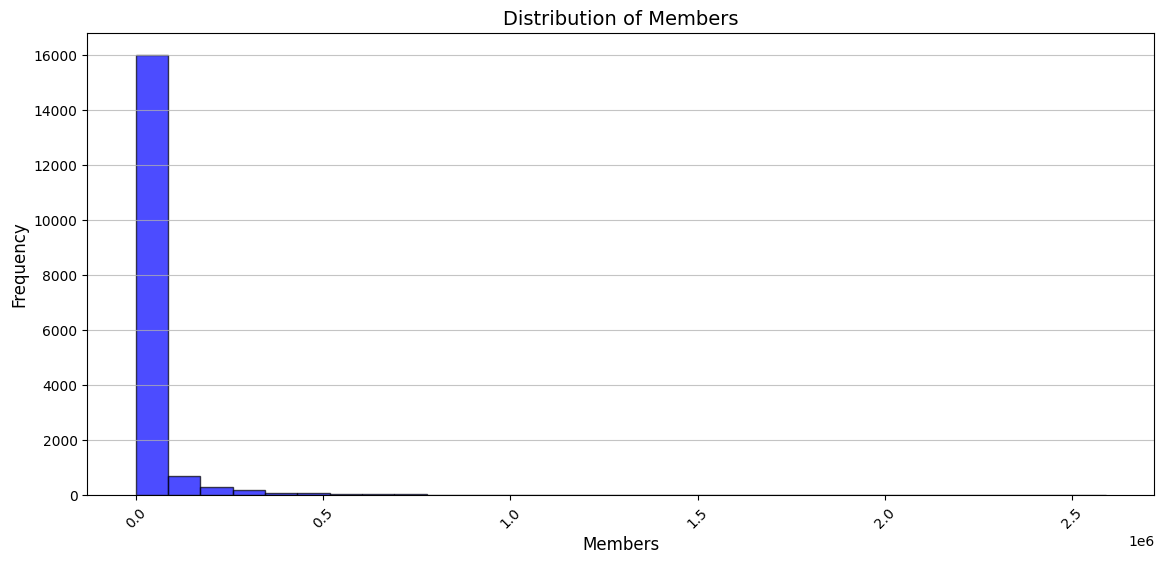

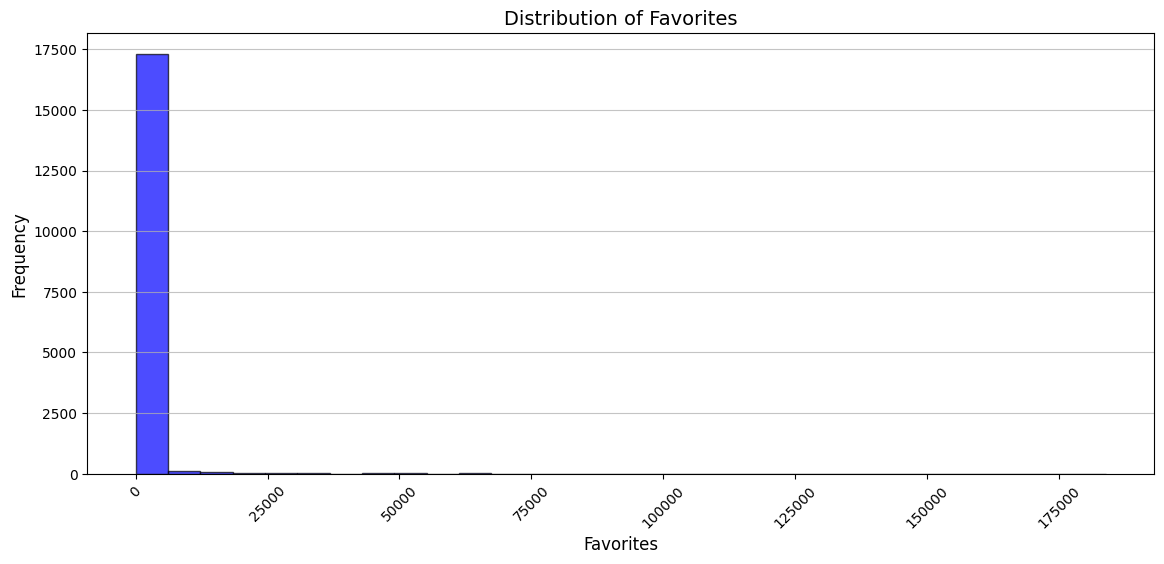

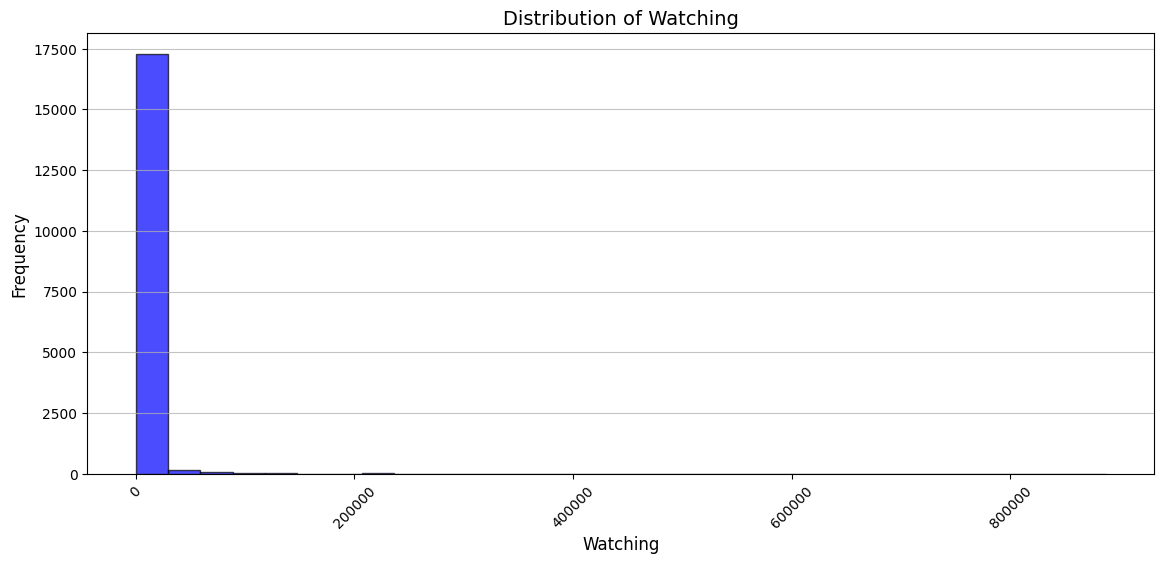

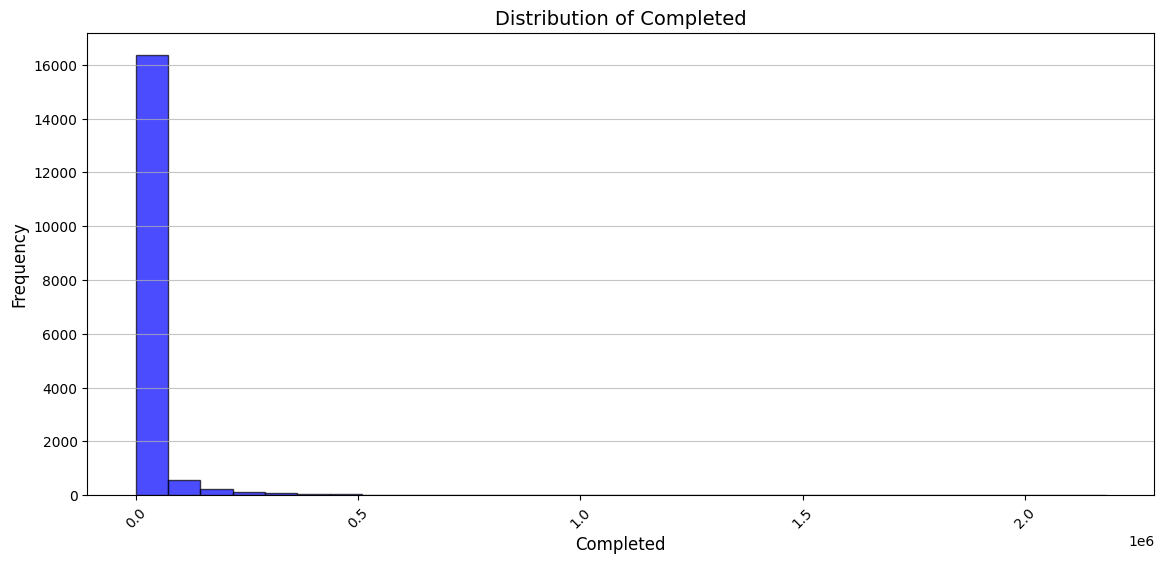

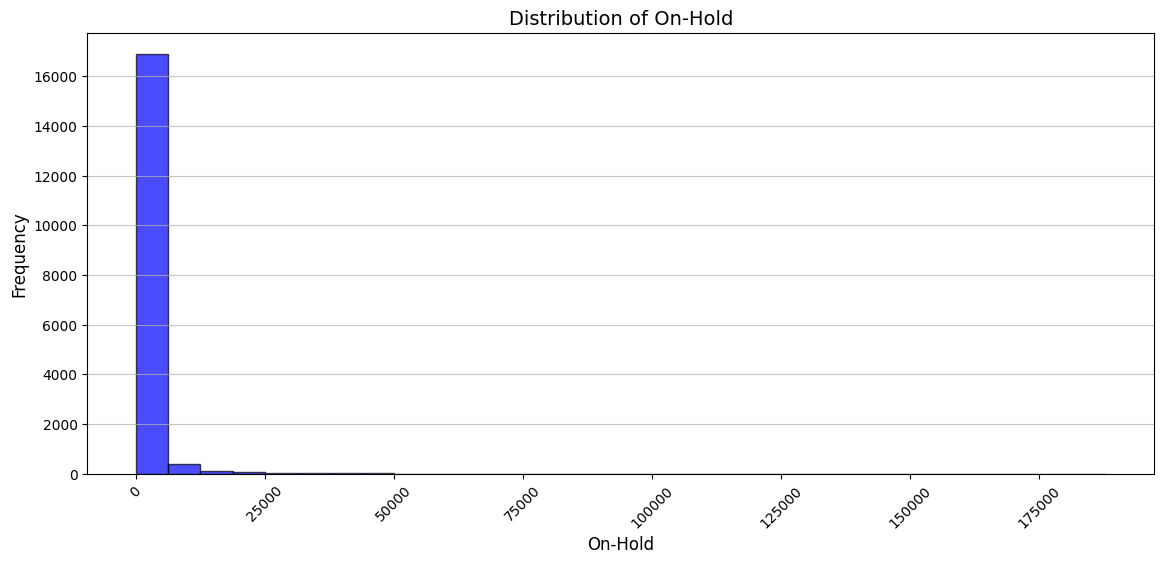

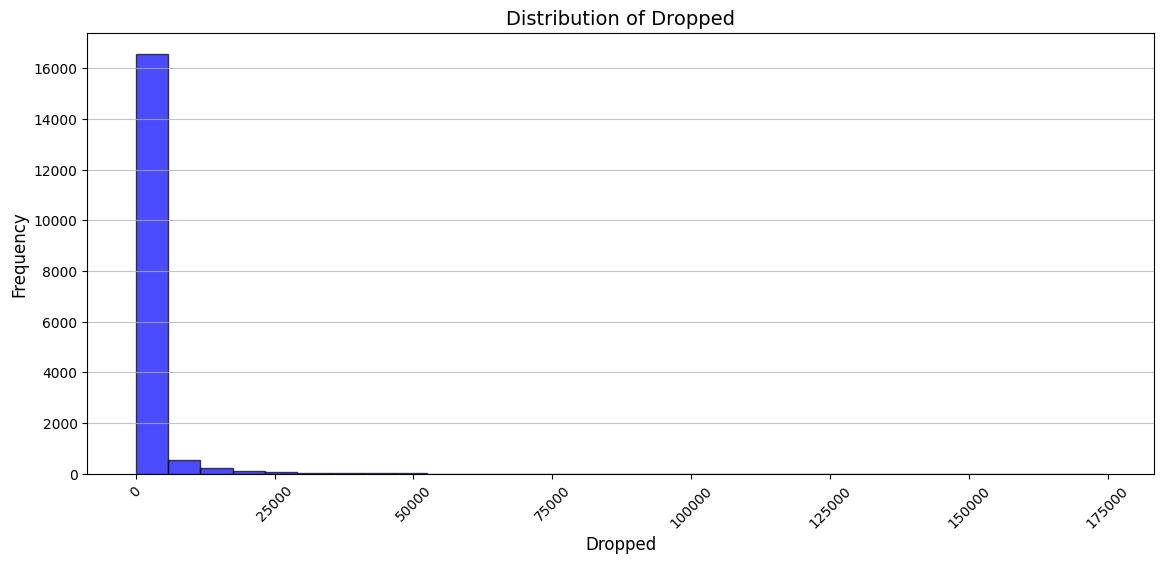

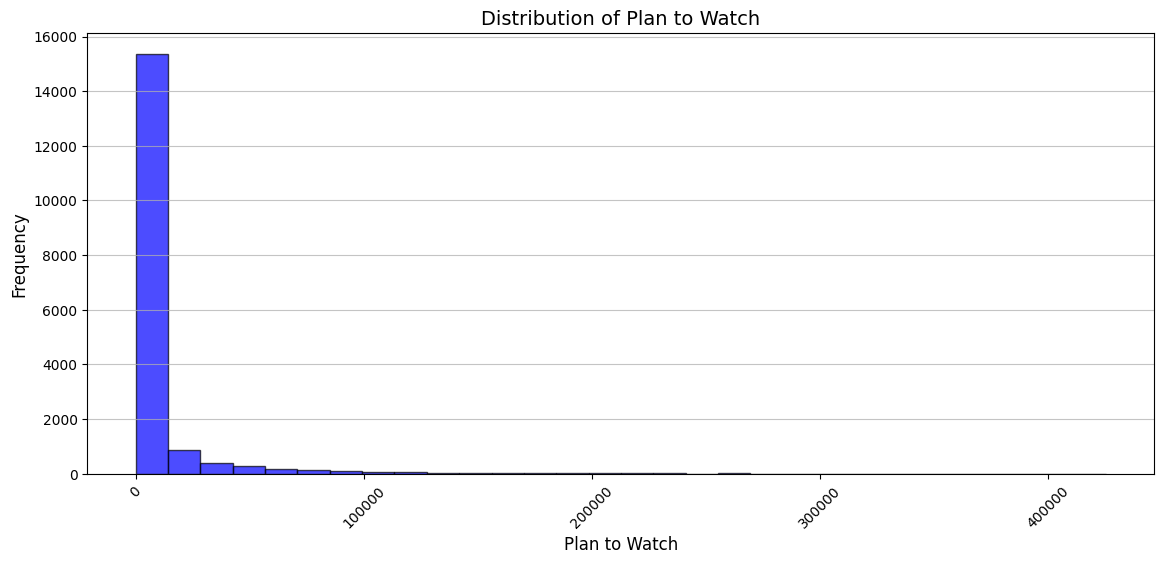

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

# Convert Episodes to numeric, replacing 'Unknown' with NaN
def convert_episodes(ep):
    try:
        return int(ep)
    except ValueError:
        return None

# Convert Premiered to year
def convert_premiered(premiered):
    if isinstance(premiered, str) and premiered != 'Unknown':
        return int(premiered.split()[-1])
    return None

# Convert Duration to minutes
def convert_duration(duration):
    if isinstance(duration, str):
        try:
            if 'hr' in duration and 'min' in duration:
                parts = duration.split()
                hours = float(parts[0])
                minutes = float(parts[2]) if len(parts) > 2 else 0
                return hours * 60 + minutes
            elif 'hr' in duration:
                hours = float(duration.split()[0])
                return hours * 60
            elif 'min' in duration:
                return float(duration.split()[0])
        except ValueError:
            return None
    return None

# Apply conversions
data['Episodes'] = data['Episodes'].apply(convert_episodes)
data['Premiered'] = data['Premiered'].apply(convert_premiered)
data['Duration'] = data['Duration'].apply(convert_duration)

# List of columns to plot
# columns_to_plot = ['Episodes', 'Premiered', 'Score', 'Duration', 'Members', 
#                   'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped', 
#                   'Plan to Watch']
columns_to_plot = ['Episodes', 'Premiered', 'Duration', 'Members', 
                  'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped', 
                  'Plan to Watch']

# Plot distributions
for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    
    # Create histogram
    plt.hist(data[col].dropna(), bins=30, color='blue', alpha=0.7, 
            edgecolor='black')
    
    # Customize plot
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout(pad=2)
    
    # Save the plot
    plt.savefig(f'distribution_{col}.png', dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()


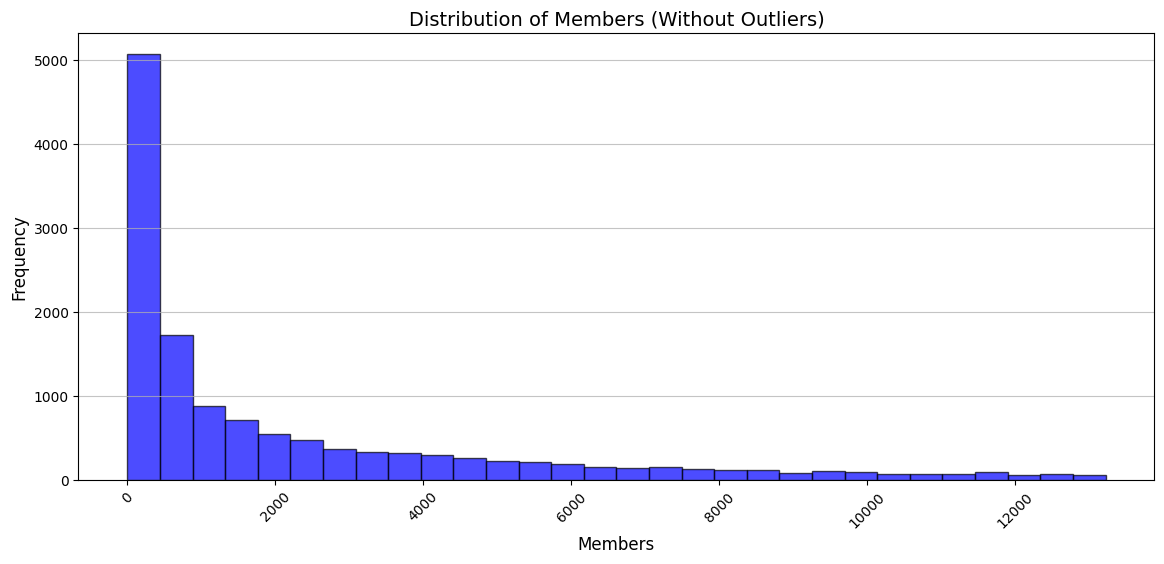

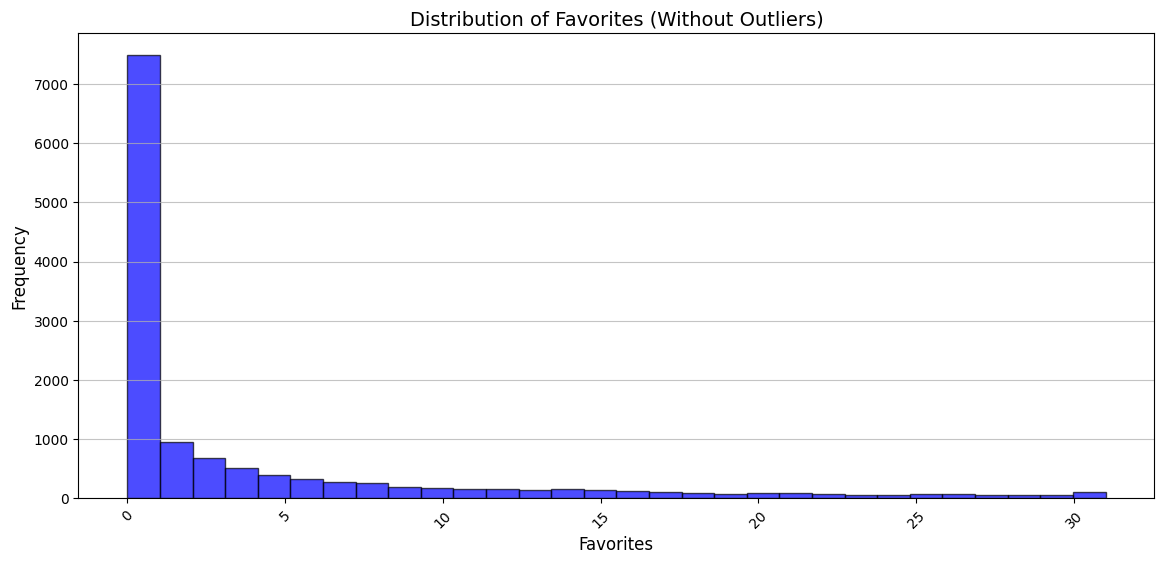

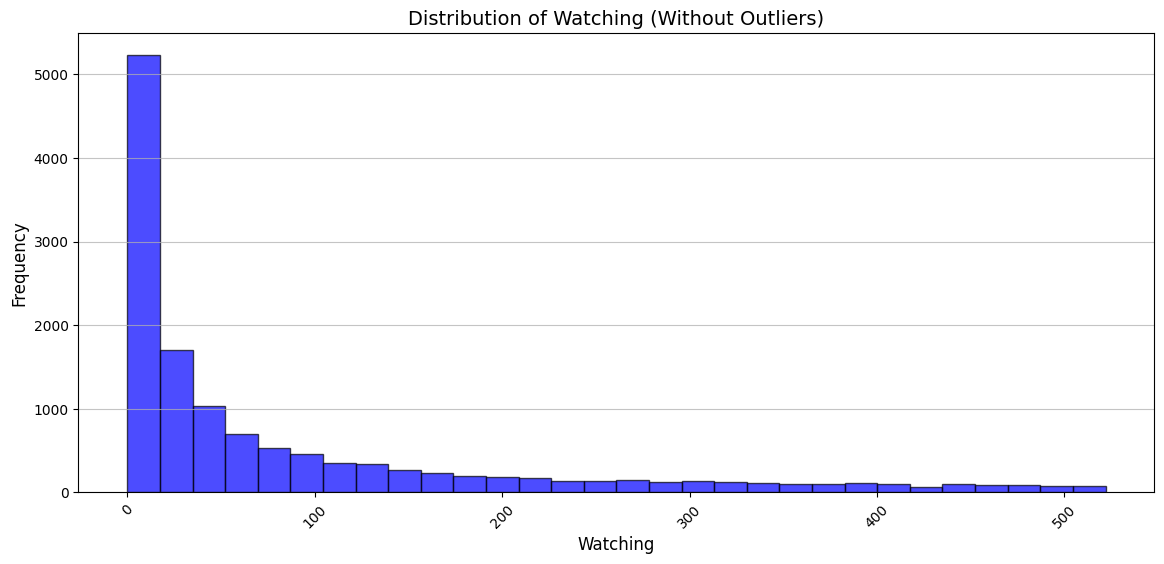

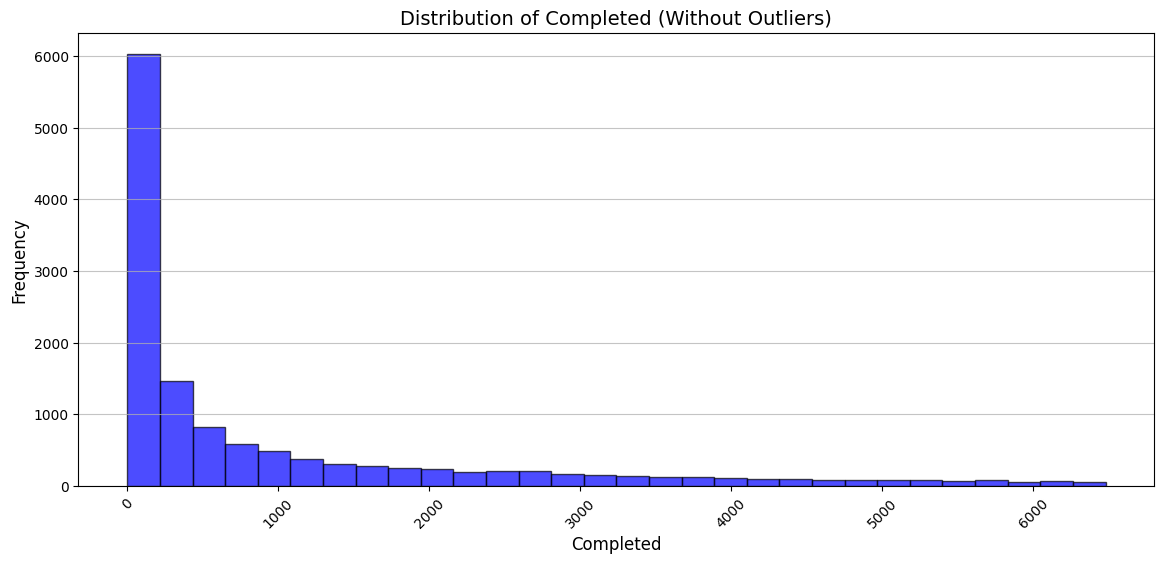

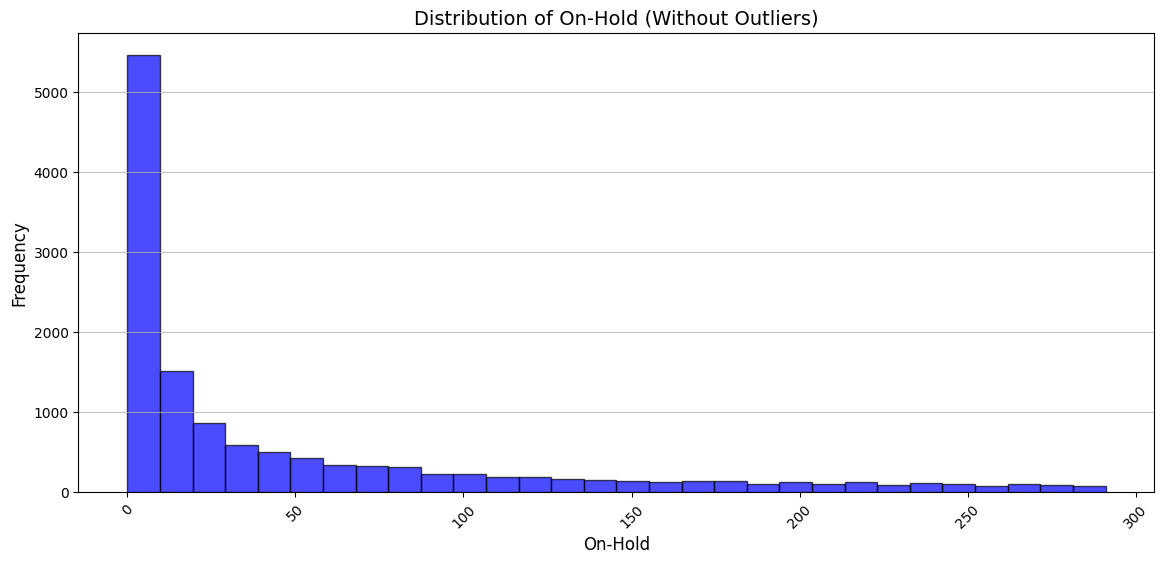

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data
anime_data = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

# Convert Episodes to numeric, replacing 'Unknown' with NaN
def convert_episodes(ep):
    try:
        return int(ep)
    except ValueError:
        return None


# Function to convert duration to minutes
def convert_duration(duration):
    try:
        if pd.isna(duration):
            return np.nan
        if 'hr' in duration and 'min' in duration:
            parts = duration.split()
            hours = float(parts[0])
            minutes = float(parts[2])
            return hours * 60 + minutes
        elif 'hr' in duration:
            hours = float(duration.split()[0])
            return hours * 60
        elif 'min' in duration:
            return float(duration.split()[0])
    except ValueError:
        return np.nan

# Convert Duration to numeric
anime_data['Episodes'] = data['Episodes'].apply(convert_episodes)
anime_data['Duration'] = anime_data['Duration'].apply(convert_duration)

# Function to remove outliers using percentile method
def remove_outliers(df, column):
    if df[column].dtype != 'object':  # Check if column is numeric
        Q1 = df[column].quantile(0.00)
        Q3 = df[column].quantile(0.75)
        return df[(df[column] >= Q1) & (df[column] <= Q3)][column]
    return df[column]

# List of numerical columns to plot
numerical_columns = ['Members', 'Favorites', 'Watching', 'Completed', 'On-Hold']

# Plot distributions without outliers
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # Get data without outliers
    clean_data = remove_outliers(anime_data, col)
    
    # Create histogram
    plt.hist(clean_data.dropna(), bins=30, color='blue', alpha=0.7, 
            edgecolor='black')
    
    # Customize plot
    plt.title(f'Distribution of {col} (Without Outliers)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', alpha=0.75)
    
    # Adjust layout
    plt.tight_layout(pad=2)
    
    # Save plot
    plt.savefig(f'distribution_{col}_no_outliers.png', dpi=300, bbox_inches='tight')
    
    # Display plot
    plt.show()


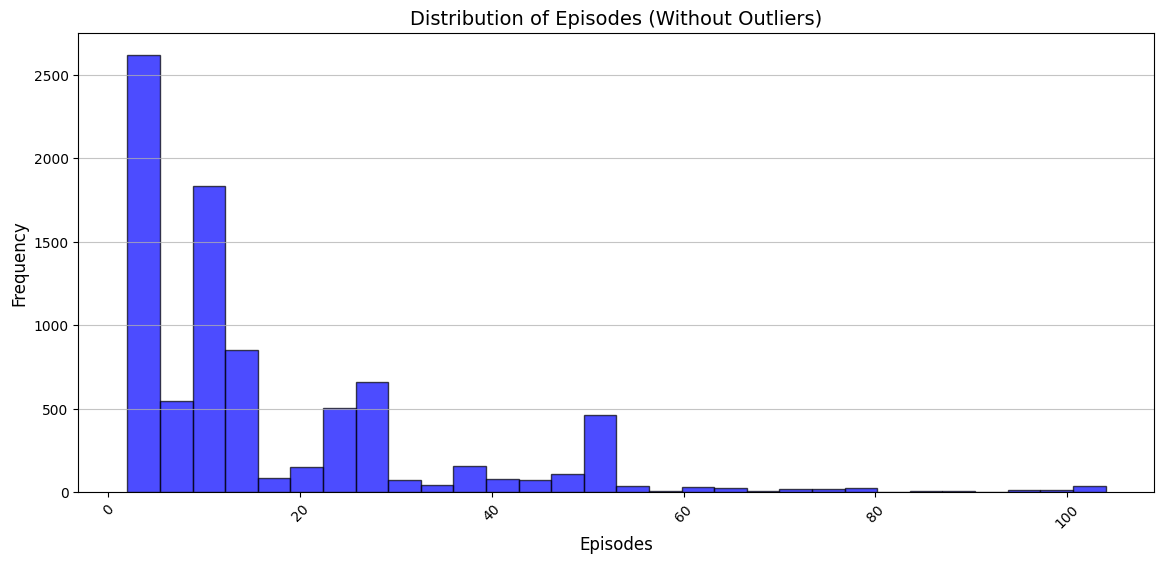

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV data
anime_data = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')

# Convert Episodes to numeric, replacing 'Unknown' with NaN
def convert_episodes(ep):
    try:
        return int(ep)
    except ValueError:
        return None


# Function to convert duration to minutes
def convert_duration(duration):
    try:
        if pd.isna(duration):
            return np.nan
        if 'hr' in duration and 'min' in duration:
            parts = duration.split()
            hours = float(parts[0])
            minutes = float(parts[2])
            return hours * 60 + minutes
        elif 'hr' in duration:
            hours = float(duration.split()[0])
            return hours * 60
        elif 'min' in duration:
            return float(duration.split()[0])
    except ValueError:
        return np.nan

# Convert Duration to numeric
anime_data['Episodes'] = data['Episodes'].apply(convert_episodes)
anime_data['Duration'] = anime_data['Duration'].apply(convert_duration)

# Function to remove outliers using percentile method
def remove_outliers(df, column):
    if df[column].dtype != 'object':  # Check if column is numeric
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.99)
        return df[(df[column] >= 2) & (df[column] <= Q3)][column]
    return df[column]

# List of numerical columns to plot
numerical_columns = ['Episodes']

# Plot distributions without outliers
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # Get data without outliers
    clean_data = remove_outliers(anime_data, col)
    
    # Create histogram
    plt.hist(clean_data.dropna(), bins=30, color='blue', alpha=0.7, 
            edgecolor='black')
    
    # Customize plot
    plt.title(f'Distribution of {col} (Without Outliers)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', alpha=0.75)
    
    # Adjust layout
    plt.tight_layout(pad=2)
    
    # Save plot
    plt.savefig(f'distribution_{col}_no_outliers.png', dpi=300, bbox_inches='tight')
    
    # Display plot
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

# Load the datasets
anime_df = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv')
ratings_df = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/rating_complete.csv')

# Calculate average rating per user
user_avg_ratings = ratings_df.groupby('user_id')['rating'].mean().reset_index()

# Process the anime dataset
def extract_year(premiered):
    if isinstance(premiered, str):
        match = re.search(r'\d{4}', premiered)
        return int(match.group()) if match else None
    return None

# Clean and prepare features
anime_features = anime_df.copy()
anime_features['year'] = anime_features['Premiered'].apply(extract_year)
anime_features['Episodes'] = pd.to_numeric(anime_features['Episodes'], errors='coerce')

# Convert duration to minutes
def convert_duration(duration):
    if isinstance(duration, str):
        if 'hr' in duration and 'min' in duration:
            hours = float(re.findall(r'(\d+)\s*hr', duration)[0])
            minutes = float(re.findall(r'(\d+)\s*min', duration)[0])
            return hours * 60 + minutes
        elif 'hr' in duration:
            hours = float(re.findall(r'(\d+)\s*hr', duration)[0])
            return hours * 60
        elif 'min' in duration:
            return float(re.findall(r'(\d+)\s*min', duration)[0])
    return None

anime_features['Duration_minutes'] = anime_features['Duration'].apply(convert_duration)

# Create genre features using one-hot encoding
genres = anime_features['Genres'].str.get_dummies(sep=', ')

# Combine features
features = pd.concat([
    anime_features[['MAL_ID', 'Episodes', 'year', 'Duration_minutes', 'Score']],
    genres
], axis=1)

# Merge with ratings
merged_data = pd.merge(ratings_df, features, left_on='anime_id', right_on='MAL_ID')

# Remove rows with missing values
merged_data = merged_data.dropna()

# Prepare features and target
X = merged_data.drop(['MAL_ID', 'anime_id', 'user_id', 'rating'], axis=1)
y = merged_data['rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error: {rmse}")

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_)
})
print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('Importance', ascending=False).head(10))


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re

# Load anime dataset with specified columns
anime_df = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/anime.csv', 
                      usecols=['MAL_ID', 'Episodes', 'Premiered', 'Duration', 'Genres', 'Score'])
ratings_df = pd.read_csv('/kaggle/input/anime-recommendation-database-2020/rating_complete.csv')



# Convert Episodes to numeric
def convert_episodes(ep):
    try:
        return float(ep)
    except (ValueError, TypeError):
        return np.nan

# Convert duration to minutes
def convert_duration(duration):
    if pd.isna(duration):
        return np.nan
    if not isinstance(duration, str):
        return np.nan
    try:
        if 'hr' in duration and 'min' in duration:
            parts = duration.split()
            hours = float(parts[0])
            minutes = float(parts[2])
            return hours * 60 + minutes
        elif 'hr' in duration:
            hours = float(duration.split()[0])
            return hours * 60
        elif 'min' in duration:
            return float(duration.split()[0])
    except (ValueError, IndexError):
        return np.nan

# Extract year from Premiered
def extract_year(premiered):
    if isinstance(premiered, str):
        match = re.search(r'\d{4}', premiered)
        return float(match.group()) if match else np.nan
    return np.nan

# Process features
anime_features = anime_df.copy()

# Convert numerical features
anime_features['Episodes'] = pd.to_numeric(anime_features['Episodes'], errors='coerce')
anime_features['Duration_minutes'] = anime_features['Duration'].apply(convert_duration)
anime_features['year'] = anime_features['Premiered'].apply(extract_year)
anime_features['Score'] = pd.to_numeric(anime_features['Score'], errors='coerce')

# Create genre features using one-hot encoding
genres = anime_features['Genres'].str.get_dummies(sep=', ')

# Get season from Premiered using one-hot encoding
anime_features['Season'] = anime_features['Premiered'].str.extract(r'(Spring|Summer|Fall|Winter)')
seasons = pd.get_dummies(anime_features['Season'], prefix='Season', dummy_na=True)

# Combine all features
features = pd.concat([
    anime_features[['MAL_ID']].astype('int32'),
    anime_features[['Episodes', 'Duration_minutes', 'Score', 'year']].astype('float32'),
    genres.astype('int8'),
    seasons.astype('int8')
], axis=1)

# Fill NaN values with appropriate values
features = features.fillna({
    'Episodes': features['Episodes'].median(),
    'Duration_minutes': features['Duration_minutes'].median(),
    'Score': features['Score'].median(),
    'year': features['year'].median()
})


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define datatypes for optimization
ratings_dtypes = {
    'user_id': 'int32',
    'anime_id': 'int32',
    'rating': 'float32'
}

# Initialize variables for chunked processing
chunk_size = 1000
X_chunks = []
y_chunks = []

# Process ratings data in chunks
for chunk in pd.read_csv('/kaggle/input/anime-recommendation-database-2020/rating_complete.csv', 
                        dtype=ratings_dtypes, 
                        chunksize=chunk_size):
    # Merge chunk with features
    merged_chunk = pd.merge(chunk, features, left_on='anime_id', right_on='MAL_ID')
    merged_chunk = merged_chunk.dropna()
    
    # Append to chunks lists
    X_chunks.append(merged_chunk.drop(['MAL_ID', 'anime_id', 'user_id', 'rating'], axis=1))
    y_chunks.append(merged_chunk['rating'])
    
    # Clear memory
    del merged_chunk

# Concatenate chunks
X = pd.concat(X_chunks, axis=0)
y = pd.concat(y_chunks, axis=0)

# Clear memory
del X_chunks, y_chunks

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clear more memory
del X, y

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse}")

# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_)
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

In [ ]:
#Remove NA's
anime = anime.dropna()

In [ ]:
#Combine title, synopsis, and Genre
anime['combined_info'] = anime.apply(lambda row: f"Title: {row['Name']}. Overview: {row['sypnopsis']} Genres: {row['Genres']}", axis=1)
anime['combined_info'][0]

In [ ]:
#Save processed dataset - combined_info for Langchain
anime[['combined_info']].to_csv('anime_updated.csv', index=False)

In [ ]:
pd.read_csv('/kaggle/working/anime_updated.csv')

**Data Loader and Vector store using Langchain**

In [ ]:
api_key = 'OPEN AI API KEY' #Put your open ai api key

In [ ]:
#data loader
loader = CSVLoader(file_path="/kaggle/working/anime_updated.csv")
data = loader.load()

#data transformers
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_documents(data)

#embeddings model, this can be a local LLM as well
embeddings = OpenAIEmbeddings(openai_api_key=api_key)
llm = OpenAI(openai_api_key=api_key)

#Vector DB
docsearch = Chroma.from_documents(texts, embeddings)

**Querying Vector DB Store for movie recommendation**

In [ ]:
query = "I'm looking for an animated action movie. What could you suggest to me?"
docs = docsearch.similarity_search(query, k=1)
docs

**Using QA Retrieval for movie recommendation**

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = api_key

In [ ]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0)

In [ ]:
qa = RetrievalQA.from_chain_type(llm,
                                 chain_type="stuff", 
                                 retriever=docsearch.as_retriever(), 
                                 return_source_documents=True)

In [ ]:
query = "I'm looking for an action anime. What could you suggest to me?"
result = qa({"query": query})
result['result']

In [ ]:
result['source_documents'][0]

**Prompt Engineering**

**First Template**

In [ ]:
from langchain.prompts import PromptTemplate

template = """You are a movie recommender system that help users to find anime that match their preferences. 
Use the following pieces of context to answer the question at the end. 
For each question, suggest three anime, with a short description of the plot and the reason why the user migth like it.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}

Question: {question}
Your response:"""


PROMPT = PromptTemplate(
    template=template, input_variables=["context", "question"])

chain_type_kwargs = {"prompt": PROMPT}

llm=ChatOpenAI(model_name='gpt-3.5-turbo', temperature=0) 

qa = RetrievalQA.from_chain_type(llm=llm, 
    chain_type="stuff", 
    retriever=docsearch.as_retriever(),
    return_source_documents=True, 
    chain_type_kwargs=chain_type_kwargs)

query = "I'm looking for an action anime with animals, any suggestions?"
result = qa({'query':query})
print(result['result'])

**Second Template** - Provinding additional user info in the context

In [ ]:
from langchain.prompts import PromptTemplate

template_prefix = """You are a movie recommender system that help users to find anime that match their preferences. 
Use the following pieces of context to answer the question at the end. 
For each question, take into account the context and the personal information provided by the user.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

{context}"""

user_info = """This is what we know about the user, and you can use this information to better tune your research:
Age: {age}
Gender: {gender}"""

template_suffix= """Question: {question}
Your response:"""

user_info = user_info.format(age = 18, gender = 'female')

COMBINED_PROMPT = template_prefix +'\n'+ user_info +'\n'+ template_suffix
print(COMBINED_PROMPT)

In [ ]:
PROMPT = PromptTemplate(
    template=COMBINED_PROMPT, input_variables=["context", "question"])

chain_type_kwargs = {"prompt": PROMPT}
qa = RetrievalQA.from_chain_type(llm=llm, 
    chain_type="stuff", 
    retriever=docsearch.as_retriever(),
    return_source_documents=True, 
    chain_type_kwargs=chain_type_kwargs)

query = "I'm looking for an action anime with animals, any suggestions?"
result = qa({'query':query})
print(result['result'])

In [ ]:
result['source_documents']